Author: Shariq Shaikh

Domain: Data Science

Batch: April 2025

Task: Movie Rating Prediction

Aim: to build a model that predicts the rating of a movie based on
features like genre, director, and actors.

1.Data and Importating Important Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#to Import the dataset
T2data = pd.read_csv('IMDb Movies India.csv', encoding='latin1')

In [ ]:
# Dataset First Look
T2data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
# Dataset Rows & Columns count
T2data.shape

(15509, 10)

In [ ]:
# Dataset Info
T2data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
# Dataset Duplicate Value Count
num_duplicate_rows = T2data.duplicated().sum()

# Display the number of duplicate rows
print("Number of Duplicate Rows in the Movie dataset:", num_duplicate_rows)

Number of Duplicate Rows in the Movie dataset: 6


In [ ]:
# Missing Values/Null Values Count
missing_values_count = T2data.isnull().sum()
# Display the missing values count for each column
print("Missing Values Count:")
print(missing_values_count)

Missing Values Count:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


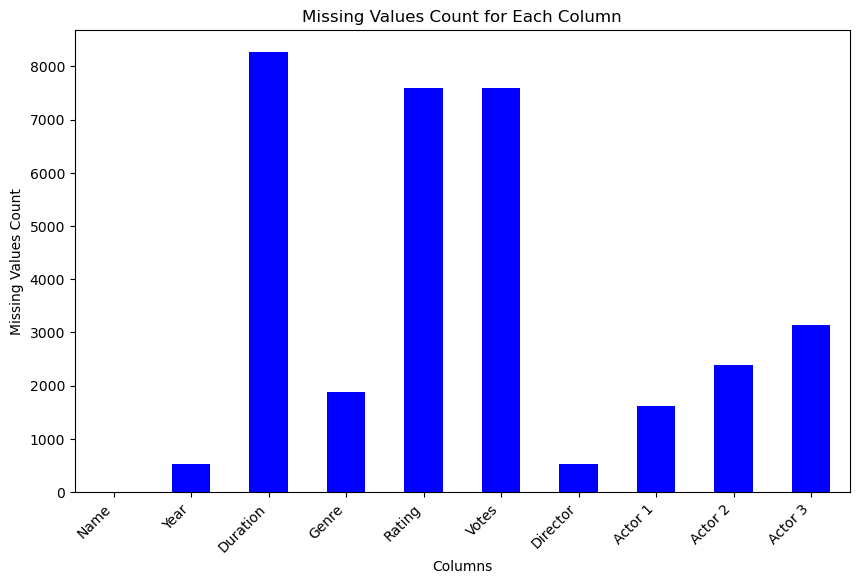

In [ ]:
# Plotting missing values count for each column
plt.figure(figsize=(10, 6))
missing_values_count.plot(kind='bar', color='blue')
plt.title('Missing Values Count for Each Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45, ha='right')
plt.show()

2.Understanding Your Variables

In [ ]:
# Dataset Columns
T2data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
# Dataset Describe
T2data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


3.Data Wrangling

In [ ]:
# Drop rows with missing 'Rating' values
T2data.dropna(subset=["Rating"], inplace=True)

# Drop rows with missing values in 'Actor 1', 'Actor 2', 'Actor 3', 'Director', and 'Genre'
T2data.dropna(subset=['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], inplace=True)

In [ ]:
T2data.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [ ]:
# Convert 'Votes' column to numeric by removing commas and converting to integer
T2data['Votes'] = T2data['Votes'].str.replace(',', '').astype(int)

# Convert 'Year' column by stripping parentheses and converting to integer
T2data['Year'] = T2data['Year'].str.strip('()').astype(int)

# Convert 'Duration' column by stripping 'min' and converting to integer
T2data['Duration'] = T2data['Duration'].str.replace(' min', '').astype(float)

# Impute missing values for 'Duration' with the median
T2data['Duration'].fillna(T2data['Duration'].median(), inplace=True)

In [ ]:
# Missing Values/Null Values 
T2data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
# Remove duplicate rows
T2data.drop_duplicates(inplace=True)

In [ ]:
# Dataset Duplicate Value Count
num_duplicate_rows = T2data.duplicated().sum()

# Display the number of duplicate rows
print("Number of Duplicate Rows in the Movie dataset:", num_duplicate_rows)

Number of Duplicate Rows in the Movie dataset: 0


In [ ]:
T2data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


4.Exploratory data Analysis

Top 10 Movies by Rating:
                      Name  Rating
8339       Love Qubool Hai    10.0
5410            Half Songs     9.7
2563                 Breed     9.6
5077          Gho Gho Rani     9.4
6852                  June     9.4
14222  The Reluctant Crime     9.4
1314          Ashok Vatika     9.3
1729              Baikunth     9.3
5125           God of gods     9.3
8344          Love Sorries     9.3


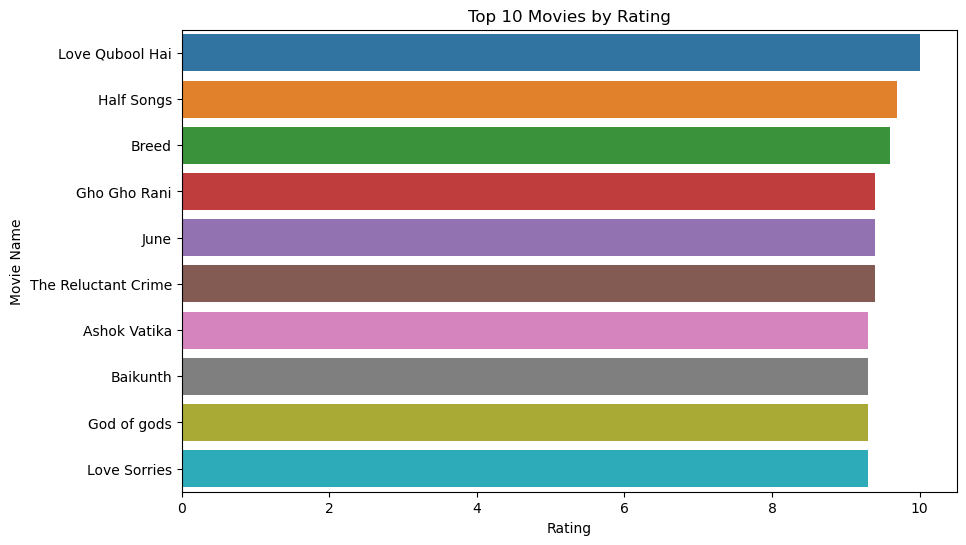

In [ ]:
# Top 10 Movies by Rating
top_movies = T2data.nlargest(10, 'Rating')
print("Top 10 Movies by Rating:")
print(top_movies[['Name', 'Rating']])

# Plot Top 10 Movies by Rating
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Name', data=top_movies)
plt.title('Top 10 Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Movie Name')
plt.show()

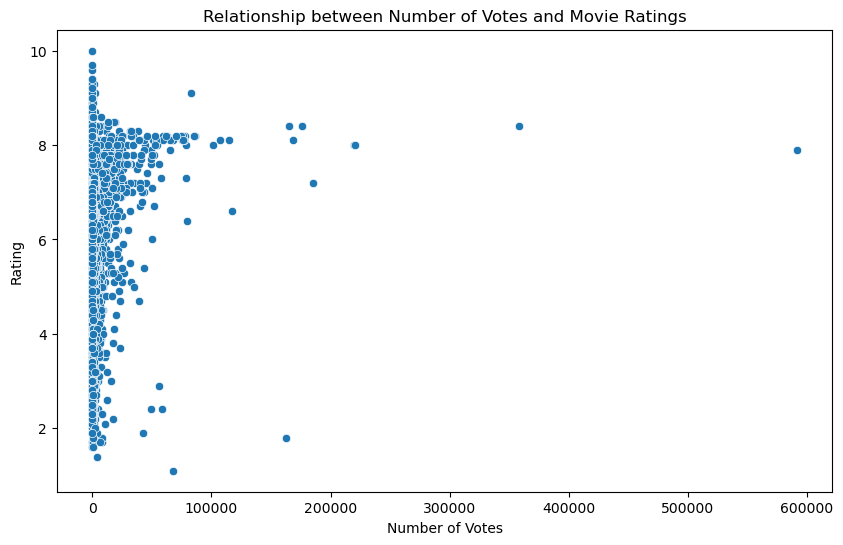

In [ ]:
# Relationship between the number of votes and movie ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Rating', data=T2data)
plt.title('Relationship between Number of Votes and Movie Ratings')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()

Top Actors by Number of Movies:
Mithun Chakraborty    231
Dharmendra            217
Jeetendra             179
Ashok Kumar           173
Amitabh Bachchan      162
Rekha                 133
Rajesh Khanna         132
Shashi Kapoor         126
Sanjay Dutt           123
Shatrughan Sinha      120
Name: count, dtype: int64


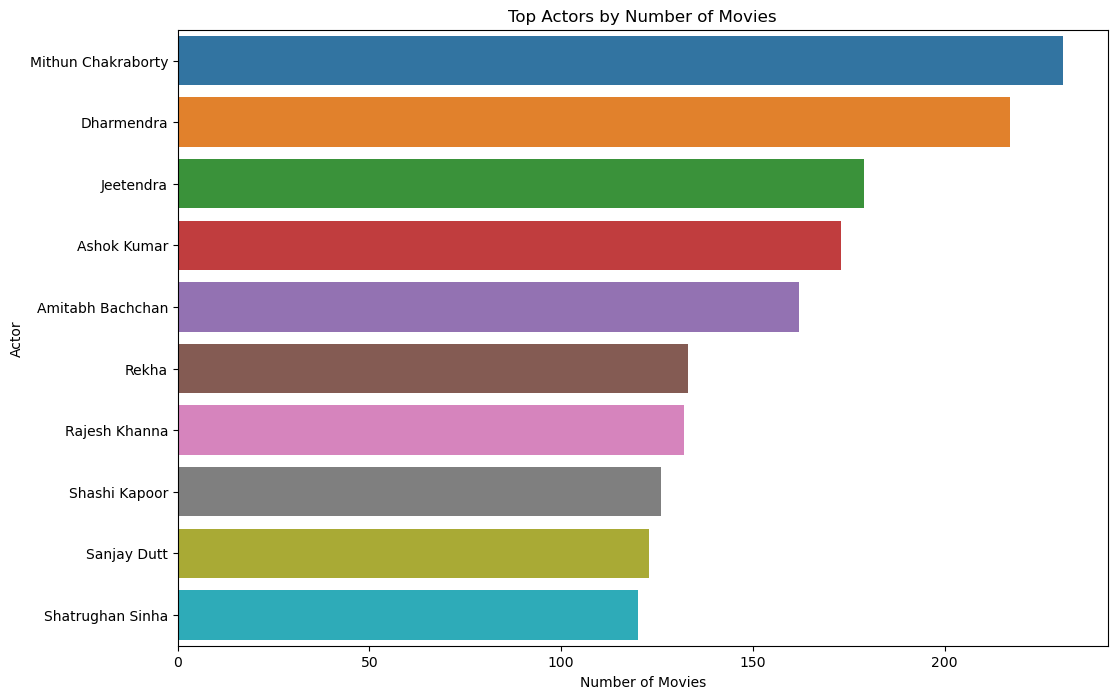

In [ ]:
# Distribution of top actors by number of movies
actor_counts = pd.concat([T2data['Actor 1'], T2data['Actor 2'], T2data['Actor 3']])
actor_counts = actor_counts.value_counts().head(10)
print("Top Actors by Number of Movies:")
print(actor_counts)

# Plot Top Actors by Number of Movies
plt.figure(figsize=(12, 8))
sns.barplot(x=actor_counts.values, y=actor_counts.index)
plt.title('Top Actors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

5.Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
labelencoder = LabelEncoder()

# Encode categorical features
T2data['Genre'] = T2data['Genre'].apply(lambda x: x.split(', '))
T2data = T2data.explode('Genre')
T2data['Genre'] = labelencoder.fit_transform(T2data['Genre'])
T2data['Director'] = labelencoder.fit_transform(T2data['Director'])
T2data['Actor 1'] = labelencoder.fit_transform(T2data['Actor 1'])
T2data['Actor 2'] = labelencoder.fit_transform(T2data['Actor 2'])
T2data['Actor 3'] = labelencoder.fit_transform(T2data['Actor 3'])

# One-hot encode the 'Genre' column
T2data = pd.get_dummies(T2data, columns=['Genre'], drop_first=True)

# Display the first few rows of the transformed data
print(T2data.head())

                                 Name  Year  Duration  Rating  Votes  \
1  #Gadhvi (He thought he was Gandhi)  2019     109.0     7.0      8   
3                             #Yaaram  2019     110.0     4.4     35   
3                             #Yaaram  2019     110.0     4.4     35   
5                ...Aur Pyaar Ho Gaya  1997     147.0     4.7    827   
5                ...Aur Pyaar Ho Gaya  1997     147.0     4.7    827   

   Director  Actor 1  Actor 2  Actor 3  Genre_1  ...  Genre_12  Genre_13  \
1       755     1686     2725      373    False  ...     False     False   
3      1637     1500      865     2543    False  ...     False     False   
3      1637     1500      865     2543    False  ...     False     False   
5      1881      481       84     2422    False  ...     False     False   
5      1881      481       84     2422    False  ...     False     False   

   Genre_14  Genre_15  Genre_16  Genre_17  Genre_18  Genre_19  Genre_20  \
1     False     False     False    

In [ ]:

# Ensure all values in 'Genre' column are strings
T2data['Genre'] = T2data['Genre'].astype(str)

# One-hot encode the 'Genre' column
T2data['Genre'] = T2data['Genre'].apply(lambda x: x.split(', '))
T2data = T2data.explode('Genre')
T2data = pd.get_dummies(T2data, columns=['Genre'], drop_first=True)

In [ ]:
T2data.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_1,...,Genre_12,Genre_13,Genre_14,Genre_15,Genre_16,Genre_17,Genre_18,Genre_19,Genre_20,Genre_21
1,#Gadhvi (He thought he was Gandhi),2019,109.0,7.0,8,755,1686,2725,373,False,...,False,False,False,False,False,False,False,False,False,False
3,#Yaaram,2019,110.0,4.4,35,1637,1500,865,2543,False,...,False,False,False,False,False,False,False,False,False,False
3,#Yaaram,2019,110.0,4.4,35,1637,1500,865,2543,False,...,False,False,False,False,True,False,False,False,False,False
5,...Aur Pyaar Ho Gaya,1997,147.0,4.7,827,1881,481,84,2422,False,...,False,False,False,False,False,False,False,False,False,False
5,...Aur Pyaar Ho Gaya,1997,147.0,4.7,827,1881,481,84,2422,False,...,False,False,False,False,False,False,False,False,False,False


6.Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Drop the 'Name' column as it is not useful for prediction
T2data.drop(columns=['Name'], inplace=True)

# Separate features and target variable
X = T2data.drop(['Rating'], axis=1)
y = T2data['Rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
y_test

4640     5.5
14536    3.4
12694    6.8
3942     8.1
13633    7.1
        ... 
1399     4.2
9114     7.2
4711     7.2
13012    4.9
12971    4.7
Name: Rating, Length: 3076, dtype: float64

7.Model Evaluation

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

# Make predictions on the test set
predictions = model.predict(X_test)

# Print the predictions
print("Predictions on the test set:", predictions)

# I want to compare the predictions with the actual ratings:
# Print the actual ratings from the test set
print("Actual ratings from the test set:", y_test)

Mean Squared Error: 1.7353295148125918
Mean Absolute Error: 1.0195608907456954
R^2 Score: 0.08024256579571831
Predictions on the test set: [6.08991645 5.83893552 5.44311857 ... 6.11514045 5.64954979 5.54572029]
Actual ratings from the test set: 4640     5.5
14536    3.4
12694    6.8
3942     8.1
13633    7.1
        ... 
1399     4.2
9114     7.2
4711     7.2
13012    4.9
12971    4.7
Name: Rating, Length: 3076, dtype: float64
